# OK cupid  data analysis

let's start with all our imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loading the profiles data file

In [4]:
profiles = pd.read_csv("profiles.csv")

## What do you do for a living?

for my jewish mother, I would like to find out what do people do for a living. This would be in precentage [%]

In [5]:
byJob = profiles.groupby('job').count()
jobs_distribution = byJob['sex']*100/sum(byJob['sex'])
jobs_distribution

job
artistic / musical / writer           8.578109
banking / financial / real estate     4.378913
clerical / administrative             1.555616
computer / hardware / software        9.099869
construction / craftsmanship          1.973023
education / academia                  6.788668
entertainment / media                 4.347994
executive / management                4.585684
hospitality / travel                  2.635851
law / legal services                  2.668702
medicine / health                     7.111386
military                              0.394218
other                                14.665301
political / government                1.368169
rather not say                        0.842545
retired                               0.483110
sales / marketing / biz dev           8.485352
science / tech / engineering          9.368478
student                               9.434181
transportation                        0.707274
unemployed                            0.527557
Name: sex

Interesting... So now I will take 4 fields, and I would like examine some specific proffesions, and check whether man and woman have an equal ratio, or there are more "manly" jobs (or vice versa).
I Chose the following:
    1. Technical job: including the following selections 'science / tech / engineering' and 'computer / hardware / software'
    2. Money: including 'banking / financial / real estate'
    3. Medical field: that would be 'medicine / health'
    4. Arts: 'artistic / musical / writer'
Let's see how the data looks:

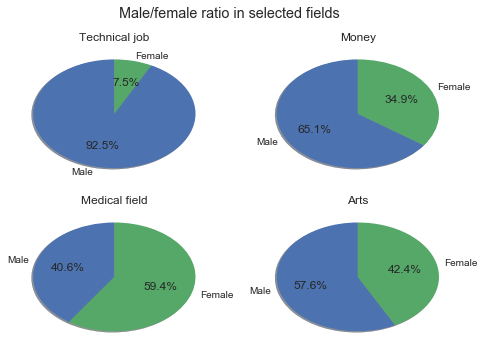

In [21]:
fig = plt.figure()
fig.suptitle('Male/female ratio in selected fields')
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

science = profiles[profiles['job'] == 'science / tech / engineering']
computers = profiles[profiles['job'] == 'computer / hardware / software']
labels = 'Male', 'Female'
sizes = [len(science[science['sex']=='m'])+len(computers[computers['sex']=='m']), len(computers[computers['sex']=='f'])]
ax1.pie(sizes, labels = labels, shadow = True, autopct = '%1.1f%%', startangle = 90)
ax1.title.set_text('Technical job')

money =  profiles[profiles['job'] == 'banking / financial / real estate']
sizes = [len(money[money['sex']=='m']), len(money[money['sex']=='f'])]
ax2.pie(sizes, labels = labels, shadow = True, autopct = '%1.1f%%', startangle = 90)
ax2.title.set_text('Money')

medicine =  profiles[profiles['job'] == 'medicine / health']
sizes = [len(medicine[medicine['sex']=='m']), len(medicine[medicine['sex']=='f'])]
ax3.pie(sizes, labels = labels, shadow = True, autopct = '%1.1f%%', startangle = 90)
ax3.title.set_text('Medical field')

art =  profiles[profiles['job'] == 'artistic / musical / writer']
sizes = [len(art[art['sex']=='m']), len(art[art['sex']=='f'])]
ax4.pie(sizes, labels = labels, shadow = True, autopct = '%1.1f%%', startangle = 90)
ax4.title.set_text('Arts')
plt.show()

As I expected, the largest difference is in the techinical field where unfortunalty there are still much less woman than man.
Luckily, in the medical field, looks like woman are more dominant.

## Age analysis

Now, I want to examine the ages of people who are using OK cupid. I assume that the majority of people will be around 25-30, since this is the age people usually finish studying and begin searching for a partner.

C:\Users\mirio\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


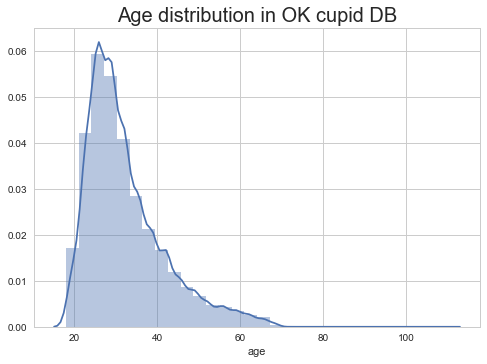

In [33]:
sns.distplot(profiles['age'], bins = 30, hist = True)
plt.title('Age distribution in OK cupid DB', fontsize= 20)
plt.show()

### Is being gay a new thing?

My hypothesis is that being gay/bisexual is becoming more and more acceptable by the society, so I would expect that if we look only at the gay histogram we will see a much "younger" behavour, compared to the "straight" population.

C:\Users\mirio\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


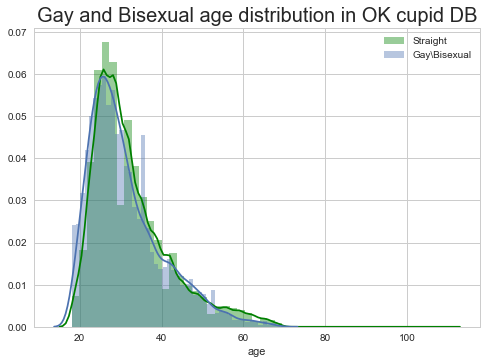

In [45]:
gay_index = profiles['orientation']=='gay'
bi_index = profiles['orientation']=='bisexual'
g_ages = profiles['age'][gay_index|bi_index]
straight_index = profiles['orientation']=='straight'
sns.distplot(profiles['age'][straight_index], hist = True, color = 'g')
sns.distplot(g_ages, hist = True)
plt.title('Gay and Bisexual age distribution in OK cupid DB', fontsize= 20)
plt.legend(['Straight', 'Gay\Bisexual'])
plt.show()

*Conclusion*: I was wrong, there is no significant differnce in histograms between the populations.

## Do people lie about their height?

Just for curiosity, let's explore the height column. according to *wikipedia*, the average height for united states adults (ages 20+) is 175.7cm for man and 161.8cm for woman. I wonder if our partner sickers happen to be taller in average...

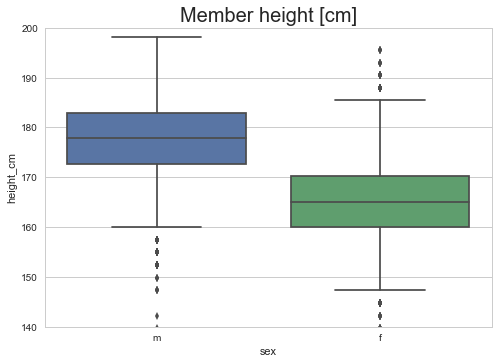

In [17]:
# convert the height from inch to cm
profiles['height_cm'] = profiles['height']*2.54
sns.set_style("whitegrid")
sns.boxplot(x = 'sex', y = 'height_cm', data = profiles)
plt.ylim(140, 200)
plt.title('Member height [cm]', fontsize= 20)
plt.show()

In [15]:
print('Average height for male group: ', np.mean(profiles['height_cm'][profiles['sex']== 'm']))
print('Average height for female group: ', np.mean(profiles['height_cm'][profiles['sex']== 'f']))

Average height for male group:  178.9264705389025
Average height for female group:  165.36383728647056


Indeed, a bit more than the true average...

## Drinking issues

In this part I tried to see is there a relation between drinking and income. I translated the drinking column to numeric values, and plotted the income as a function of drinking.

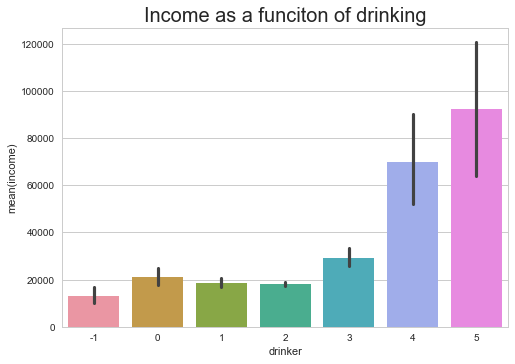

In [56]:
drinks_dict = {'no answer': -1, 'very often':4, 'often':3, 'socially':2, 'rarely':1, 'desperately':5, 'not at all':0, 'never':0, 'sometimes':2}
profiles['drinks'].replace(np.nan, 'no answer', inplace=True)
profiles['drinker'] = profiles['drinks'].apply(lambda x: drinks_dict[x] )
sns.barplot(x = 'drinker', y = 'income', data = profiles)
plt.title('Income as a funciton of drinking', fontsize = 20)
plt.show()

I am not sure if the result above is correct or I did something wrong, but the conclusion from the graph above is that high income also tends to drink more...

## How many languages do you know?

In order to find out how many languages do people know, I will analyse the language column, and create a new column of the number of inputs in the language column.

note: I will refer to an empty cell as 'no answer' which will be interpreted as 1 language.

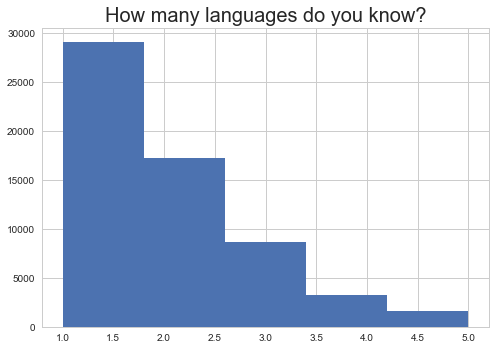

In [47]:
profiles['speaks'].replace(np.nan, 'no answer', inplace=True)    
profiles['languages'] = profiles['speaks'].apply(lambda str: len(str.split(',')))
plt.hist(profiles['languages'], bins = 5 )
plt.title('How many languages do you know?', fontsize = 20)
plt.show()

Most people know only one language, and there is a linear decline. 

I will stop herecause I can't find anything intersting, not enough numeric data in this DB :) 